In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from train_selection_MAE import Edge, Node, Graph
import seaborn as sns
import os

### initialization

In [2]:
if not os.path.exists("large_intestine_output"):
    os.makedirs("large_intestine_output")
# uncomment to run but there are existing files for demo
# !python ../train_net/corr.py --csv_path '../csv/train_path_LI.csv' --num_biomarkers 46 --save_path 'large_intestine_output/mae_mtx_li_single' --transform_signal normalize  # get initial edge weights
scores = np.load("large_intestine_output/mae_mtx_li_single.npy")

In [3]:
num_biomarkers = 46

nodes = []
for i in range(num_biomarkers):
    nodes.append(Node(i, num_biomarkers))

edges = []
for i in range(num_biomarkers):
    for j in range(i+1,num_biomarkers):
        edge = Edge(scores[i,j])
        edge.nodes = (i,j)
        edges.append(edge)
        nodes[i].edges.append(edge)
        nodes[j].edges.append(edge)

g = Graph(nodes,edges, num_biomarkers)

In [4]:
# chose the 1st input
node_degrees = []
for n in g.nodes:
    degree = sum(e.value for e in n.edges)
    minDegree = min(e.value for e in n.edges)
    n.init_degree = minDegree
    node_degrees.append(degree)
x = np.argmin(node_degrees)

g.input_.append(x)
idx = int(g.input_[-1])

print("add marker",idx, "into input")
print("input:", g.input_)

for i in g.output:
    if i == idx:
        g.output.remove(i)
print("output: ", g.output)

out = g.output.copy()

add marker 3 into input
input: [3]
output:  [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


### Round1

In [5]:
# train the network with currect input and output markers 
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_01'  --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv"  --input_index 3  --target_index 0 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45   --in_dim 1 --out_dim 45 
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_01'  --path_output_dir 'large_intestine_output/val_vae_01.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3  --target_index 0 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45  --in_dim 1 --out_dim 45 

In [6]:
val_loss_path = r'large_intestine_output/val_vae_01.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 18 into input
input: [3, 18]
output:  [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
--out_drop_index: 17


### Round2

In [7]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_02'  --path_pretrain_dir 'test_models_LI_single_01' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 17 --input_index 3 18 --target_index 0 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45  --in_dim 2 --out_dim 44
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_02'  --path_output_dir 'large_intestine_output/val_vae_02.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18  --target_index 0 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45  --in_dim 2 --out_dim 44

In [8]:
val_loss_path = r'large_intestine_output/val_vae_02.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 0 into input
input: [3, 18, 0]
output:  [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
--out_drop_index: 0


### Round3

In [9]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_03'  --path_pretrain_dir 'test_models_LI_single_02' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 0 --input_index 3 18 0 --target_index 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45  --in_dim 3 --out_dim 43
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_03'  --path_output_dir 'large_intestine_output/val_vae_03.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0  --target_index 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45  --in_dim 3 --out_dim 43

In [10]:
val_loss_path = r'large_intestine_output/val_vae_03.npy'

idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 28 into input
input: [3, 18, 0, 28]
output:  [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
--out_drop_index: 25


### Round4

In [11]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_04'  --path_pretrain_dir 'test_models_LI_single_03' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 25 --input_index 3 18 0 28 --target_index 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45  --in_dim 4 --out_dim 42
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_04'  --path_output_dir 'large_intestine_output/val_vae_04.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28  --target_index 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45  --in_dim 4 --out_dim 42

In [12]:
val_loss_path = r'large_intestine_output/val_vae_04.npy'  
idx = g.updateAndFindNext(idx, val_loss_path) 
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 41 into input
input: [3, 18, 0, 28, 41]
output:  [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45]
--out_drop_index: 37


### Round5

In [13]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_05'  --path_pretrain_dir 'test_models_LI_single_04' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 37 --input_index 3 18 0 28 41 --target_index 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45  --in_dim 5 --out_dim 41
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_05'  --path_output_dir 'large_intestine_output/val_vae_05.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28  --target_index 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45  --in_dim 5 --out_dim 41

In [14]:
val_loss_path = r'large_intestine_output/val_vae_05.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 7 into input
input: [3, 18, 0, 28, 41, 7]
output:  [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45]
--out_drop_index: 5


### Round6

In [15]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_06'  --path_pretrain_dir 'test_models_LI_single_05' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 5 --input_index 3 18 0 28 41 7 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45  --in_dim 6 --out_dim 40
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_06'  --path_output_dir 'large_intestine_output/val_vae_06.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7  --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45  --in_dim 6 --out_dim 40

In [16]:
val_loss_path = r'large_intestine_output/val_vae_06.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 34 into input
input: [3, 18, 0, 28, 41, 7, 34]
output:  [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45]
--out_drop_index: 29


### Round7

In [17]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_07'  --path_pretrain_dir 'test_models_LI_single_06' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 29 --input_index 3 18 0 28 41 7 34 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 35 36 37 38 39 40 42 43 44 45  --in_dim 7 --out_dim 39
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_07'  --path_output_dir 'large_intestine_output/val_vae_07.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34  --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 35 36 37 38 39 40 42 43 44 45  --in_dim 7 --out_dim 39

In [18]:
val_loss_path = r'large_intestine_output/val_vae_07.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 44 into input
input: [3, 18, 0, 28, 41, 7, 34, 44]
output:  [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 45]
--out_drop_index: 37


### Round8

In [19]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_08'  --path_pretrain_dir 'test_models_LI_single_07' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 37 --input_index 3 18 0 28 41 7 34 44 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 35 36 37 38 39 40 42 43 45  --in_dim 8 --out_dim 38
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_08'  --path_output_dir 'large_intestine_output/val_vae_08.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 29 30 31 32 33 35 36 37 38 39 40 42 43 45  --in_dim 8 --out_dim 38

In [20]:
val_loss_path = r'large_intestine_output/val_vae_08.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 17 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17]
output:  [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 45]
--out_drop_index: 14


### Round9

In [21]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_09'  --path_pretrain_dir 'test_models_LI_single_08' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 14 --input_index 3 18 0 28 41 7 34 44 17 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 25 26 27 29 30 31 32 33 35 36 37 38 39 40 42 43 45  --in_dim 9 --out_dim 37
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_09'  --path_output_dir 'large_intestine_output/val_vae_09.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 25 26 27 29 30 31 32 33 35 36 37 38 39 40 42 43 45  --in_dim 9 --out_dim 37

In [22]:
val_loss_path = r'large_intestine_output/val_vae_09.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 25 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25]
output:  [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 42, 43, 45]
--out_drop_index: 20


### Round10

In [23]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_10'  --path_pretrain_dir 'test_models_LI_single_09' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 20 --input_index 3 18 0 28 41 7 34 44 17 25 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 26 27 29 30 31 32 33 35 36 37 38 39 40 42 43 45  --in_dim 10 --out_dim 36
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_10'  --path_output_dir 'large_intestine_output/val_vae_10.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 26 27 29 30 31 32 33 35 37 38 39 40 42 43 45  --in_dim 10 --out_dim 36

In [24]:
val_loss_path = r'large_intestine_output/val_vae_10.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 36 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36]
output:  [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 42, 43, 45]
--out_drop_index: 28


### Round11

In [25]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_11'  --path_pretrain_dir 'test_models_LI_single_10' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 28 --input_index 3 18 0 28 41 7 34 44 17 25 36 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 26 27 29 30 31 32 33 35 37 38 39 40 42 43 45  --in_dim 11 --out_dim 35
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_11'  --path_output_dir 'large_intestine_output/val_vae_11.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 35 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 26 27 29 30 31 32 33 37 38 39 40 42 43 45  --in_dim 11 --out_dim 35

In [26]:
val_loss_path = r'large_intestine_output/val_vae_11.npy'  
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 27 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36, 27]
output:  [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 26, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 42, 43, 45]
--out_drop_index: 21


### Round12

In [27]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_12'  --path_pretrain_dir 'test_models_LI_single_11' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 21 --input_index 3 18 0 28 41 7 34 44 17 25 36 27 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 26 29 30 31 32 33 35 37 38 39 40 42 43 45  --in_dim 12 --out_dim 34
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_11'  --path_output_dir 'large_intestine_output/val_vae_11.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 35 27 --target_index 1 2 4 5 6 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 26 29 30 31 32 33 37 38 39 40 42 43 45  --in_dim 12 --out_dim 34

In [28]:
val_loss_path = r'large_intestine_output/val_vae_12.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 6 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36, 27, 6]
output:  [1, 2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 26, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 42, 43, 45]
--out_drop_index: 4


### Round13

In [29]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_13'  --path_pretrain_dir 'test_models_LI_single_12' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 4 --input_index 3 18 0 28 41 7 34 44 17 25 36 27 6  --target_index 1 2 4 5 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 26 29 30 31 32 33 35 37 38 39 40 42 43 45  --in_dim 13 --out_dim 33
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_13'  --path_output_dir 'large_intestine_output/val_vae_13.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 35 27 6  --target_index 1 2 4 5 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 26 29 30 31 32 33 37 38 39 40 42 43 45  --in_dim 13 --out_dim 33

In [30]:
val_loss_path = r'large_intestine_output/val_vae_13.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 14 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36, 27, 6, 14]
output:  [1, 2, 4, 5, 8, 9, 10, 11, 12, 13, 15, 16, 19, 20, 21, 22, 23, 24, 26, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 42, 43, 45]
--out_drop_index: 10


### Round14

In [31]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_14'  --path_pretrain_dir 'test_models_LI_single_13' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 10 --input_index 3 18 0 28 41 7 34 44 17 25 36 27 6 14 --target_index 1 2 4 5 8 9 10 11 12 13 15 16 19 20 21 22 23 24 26 29 30 31 32 33 35 37 38 39 40 42 43 45  --in_dim 14 --out_dim 32
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_14'  --path_output_dir 'large_intestine_output/val_vae_14.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 35 27 6 14  --target_index 1 2 4 5 8 9 10 11 12 13 15 16 19 20 21 22 23 24 26 29 30 31 32 33 37 38 39 40 42 43 45  --in_dim 14 --out_dim 32

In [32]:
val_loss_path = r'large_intestine_output/val_vae_14.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 40 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36, 27, 6, 14, 40]
output:  [1, 2, 4, 5, 8, 9, 10, 11, 12, 13, 15, 16, 19, 20, 21, 22, 23, 24, 26, 29, 30, 31, 32, 33, 35, 37, 38, 39, 42, 43, 45]
--out_drop_index: 28


### Round15

In [33]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_15'  --path_pretrain_dir 'test_models_LI_single_14' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 28 --input_index 3 18 0 28 41 7 34 44 17 25 36 27 6 14 40 --target_index 1 2 4 5 8 9 10 11 12 13 15 16 19 20 21 22 23 24 26 29 30 31 32 33 35 37 38 39 42 43 45  --in_dim 15 --out_dim 31
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_15'  --path_output_dir 'large_intestine_output/val_vae_15.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 35 27 6 14 15  --target_index 1 2 4 5 8 9 10 11 12 13 16 19 20 21 22 23 24 26 29 30 31 32 33 37 38 39 40 42 43 45  --in_dim 15 --out_dim 31

In [34]:
val_loss_path = r'large_intestine_output/val_vae_15.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 13 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36, 27, 6, 14, 40, 13]
output:  [1, 2, 4, 5, 8, 9, 10, 11, 12, 15, 16, 19, 20, 21, 22, 23, 24, 26, 29, 30, 31, 32, 33, 35, 37, 38, 39, 42, 43, 45]
--out_drop_index: 9


### Round16

In [35]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_16'  --path_pretrain_dir 'test_models_LI_single_15' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 9 --input_index 3 18 0 28 41 7 34 44 17 25 36 27 6 14 40 13 --target_index 1 2 4 5 8 9 10 11 12 15 16 19 20 21 22 23 24 26 29 30 31 32 33 35 37 38 39 42 43 45  --in_dim 16 --out_dim 30
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_16'  --path_output_dir 'large_intestine_output/val_vae_16.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 35 27 6 14 15 13  --target_index 1 2 4 5 8 9 10 11 12 16 19 20 21 22 23 24 26 29 30 31 32 33 37 38 39 40 42 43 45  --in_dim 16 --out_dim 30

In [36]:
val_loss_path = r'large_intestine_output/val_vae_16.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 23 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36, 27, 6, 14, 40, 13, 23]
output:  [1, 2, 4, 5, 8, 9, 10, 11, 12, 15, 16, 19, 20, 21, 22, 24, 26, 29, 30, 31, 32, 33, 35, 37, 38, 39, 42, 43, 45]
--out_drop_index: 15


### Roung17

In [37]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_17'  --path_pretrain_dir 'test_models_LI_single_16' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 15 --input_index 3 18 0 28 41 7 34 44 17 25 36 27 6 14 40 13 23 --target_index 1 2 4 5 8 9 10 11 12 15 16 19 20 21 22 24 26 29 30 31 32 33 35 37 38 39 42 43 45  --in_dim 17 --out_dim 29
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_17'  --path_output_dir 'large_intestine_output/val_vae_17.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 35 27 6 14 15 13 23  --target_index 1 2 4 5 8 9 10 11 12 16 19 20 21 22 24 26 29 30 31 32 33 37 38 39 40 42 43 45  --in_dim 17 --out_dim 29

In [38]:
val_loss_path = r'large_intestine_output/val_vae_17.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 37 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36, 27, 6, 14, 40, 13, 23, 37]
output:  [1, 2, 4, 5, 8, 9, 10, 11, 12, 15, 16, 19, 20, 21, 22, 24, 26, 29, 30, 31, 32, 33, 35, 38, 39, 42, 43, 45]
--out_drop_index: 23


### Round18

In [39]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_18'  --path_pretrain_dir 'test_models_LI_single_17' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 23 --input_index 3 18 0 28 41 7 34 44 17 25 36 27 6 14 40 13 23 37 --target_index 1 2 4 5 8 9 10 11 12 15 16 19 20 21 22 24 26 29 30 31 32 33 35 38 39 42 43 45  --in_dim 18 --out_dim 28
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_18'  --path_output_dir 'large_intestine_output/val_vae_18.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 35 27 6 14 15 13 23 37 --target_index 1 2 4 5 8 9 10 11 12 16 19 20 21 22 24 26 29 30 31 32 33 38 39 40 42 43 45  --in_dim 18 --out_dim 28

In [40]:
val_loss_path = r'large_intestine_output/val_vae_18.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 8 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36, 27, 6, 14, 40, 13, 23, 37, 8]
output:  [1, 2, 4, 5, 9, 10, 11, 12, 15, 16, 19, 20, 21, 22, 24, 26, 29, 30, 31, 32, 33, 35, 38, 39, 42, 43, 45]
--out_drop_index: 4


### Round19

In [41]:
# !python ../train_net/train_model.py --transform_signal normalize --n_iter 4000  --interval_save 200 --iter_checkpoint 200 --drop_patch_threshold -13000 --path_run_dir 'test_models_LI_single_19'  --path_pretrain_dir 'test_models_LI_single_18' --path_dataset_csv "../csv/train_path_LI.csv"  --path_dataset_val_csv "../csv/val_path_LI.csv" --out_drop_index 4 --input_index 3 18 0 28 41 7 34 44 17 25 36 27 6 14 40 13 23 37 8 --target_index 1 2 4 5 9 10 11 12 15 16 19 20 21 22 24 26 29 30 31 32 33 35 38 39 42 43 45  --in_dim 19 --out_dim 27
# !python ../train_net/validation.py --transform_signal normalize --n_iter 4000 --path_run_dir 'test_models_LI_single_19'  --path_output_dir 'large_intestine_output/val_vae_19.npy' --path_dataset_val_csv "../csv/val_path_LI.csv"   --input_index  3 18 0 28 7 34 37 17 25 35 27 6 14 15 13 23 37 8 --target_index 1 2 4 5 9 10 11 12 16 19 20 21 22 24 26 29 30 31 32 33 38 39 40 42 43 45  --in_dim 19 --out_dim 27

In [42]:
val_loss_path = r'large_intestine_output/val_vae_19.npy' 
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 32 into input
input: [3, 18, 0, 28, 41, 7, 34, 44, 17, 25, 36, 27, 6, 14, 40, 13, 23, 37, 8, 32]
output:  [1, 2, 4, 5, 9, 10, 11, 12, 15, 16, 19, 20, 21, 22, 24, 26, 29, 30, 31, 33, 35, 38, 39, 42, 43, 45]
--out_drop_index: 19


In [43]:
with open('marker_list/LI46.txt') as f:
    li_markers = f.read().splitlines()

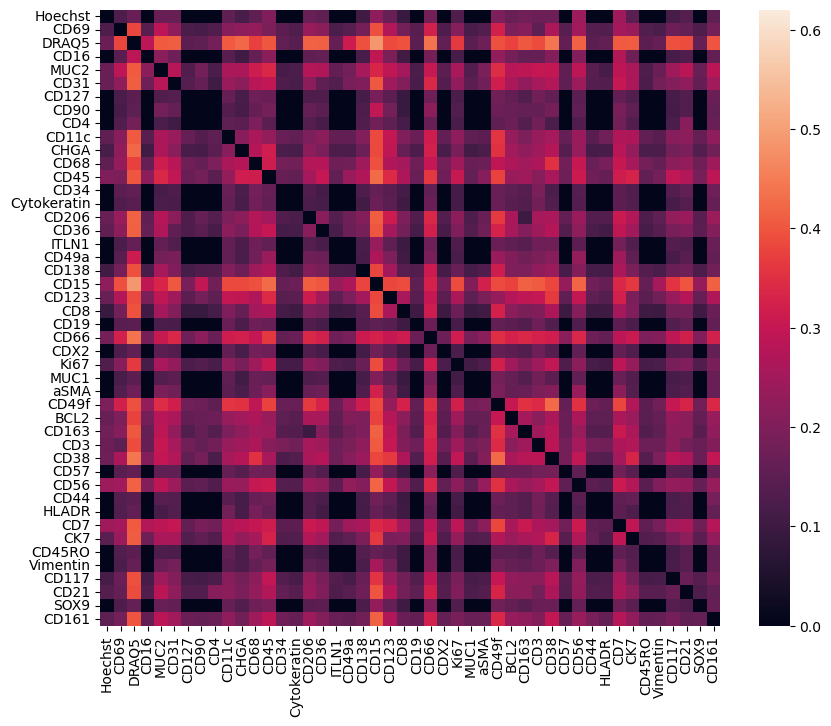

In [44]:
n = len(g.nodes)
edge_mtx = np.zeros((n, n))
for i in range(n):
    edges = g.nodes[i].edges
    for k in range(i, len(edges)):
        j = k+1
        edge_mtx[i,j] = edges[k].value
for j in range(n):
    edge_mtx[j, j] = 0
    for i in range(j+1, n):
        edge_mtx[i, j] = edge_mtx[j, i]

fig, ax = plt.subplots(figsize=(10, 8))
df = pd.DataFrame(edge_mtx)
p = sns.heatmap(df, xticklabels=True, yticklabels=True, vmin=0, vmax = 0.62)
p.set_xticklabels(li_markers, rotation=90)
p.set_yticklabels(li_markers, rotation=0)
plt.show()

### test

In [45]:
# !python ../train_net/predict_full_view.py --transform_signal normalize --save_image  --path_run_dir 'test_models_LI_single_19'  --path_dataset_csv "../csv/test_path_LI.csv" --input_index 3 18 0 28 7 34 37 17 25 35 27 6 14 15 13 23 37 8 --target_index 1 2 4 5 9 10 11 12 16 19 20 21 22 24 26 29 30 31 32 33 38 39 40 42 43 45 

cropped image in Figure 5

In [46]:
from visualization import *

In [47]:
inf3 = inf3, top3, path_real, path_synth, transform_signal, w_start, w_end, h_start, h_end, output_dir)[4, 24, 9]
top3 = [21, 1, 29]
path_real = "../data/large_intestine/normalized_images/HBM964.FPNH.767.tiff"
path_synth = "test_models_LI_single_19/imgs/3_synth.tiff"
transform_signal = 'normalize'
w_start = 5500
w_end = 7000
h_start = 3000
h_end = 4500
output_dir = "large_intestine_output"
path_synth_mp = "../mp/large_intestine_output/3_synth.tiff"

crop_image(

get top3, inferior3 markers and their most similar observed markers

In [48]:
idx1 = [3, 18, 0, 28, 7, 34, 37, 17, 25, 35, 27, 6, 14, 15, 13, 23, 37, 8]
idx2 = [1, 2, 4, 5, 9, 10, 11, 12, 16, 19, 20, 21, 22, 24, 26, 29, 30, 31, 32, 33, 38, 39, 40, 42, 43, 45]
select_markers(idx1, idx2, path_real, path_synth, transform_signal)